## The Newton-Raphson method

The efficiency and generalizability of the Newton-Raphson method makes it the go-to root finder for nonlinear system solvers.

> NB: many people abbreviate 'The Newton-Raphson method' to simply 'The Newton method', but this causes confusion with Newton's method for optimization which is realted, but a different algorithm.

The Newton-Raphson method has quadratic convergence ($k=2$) *near the root* which is a great result! It does so, however at the cost of calculating the Jacobian and solving a linear system.

As we saw in the previous lecture, Newton's method amounts to usign the current position and the (true) tangent to estimate the next guess:

$$ f'(x) \Delta x = - f(x)$$

Graphically:

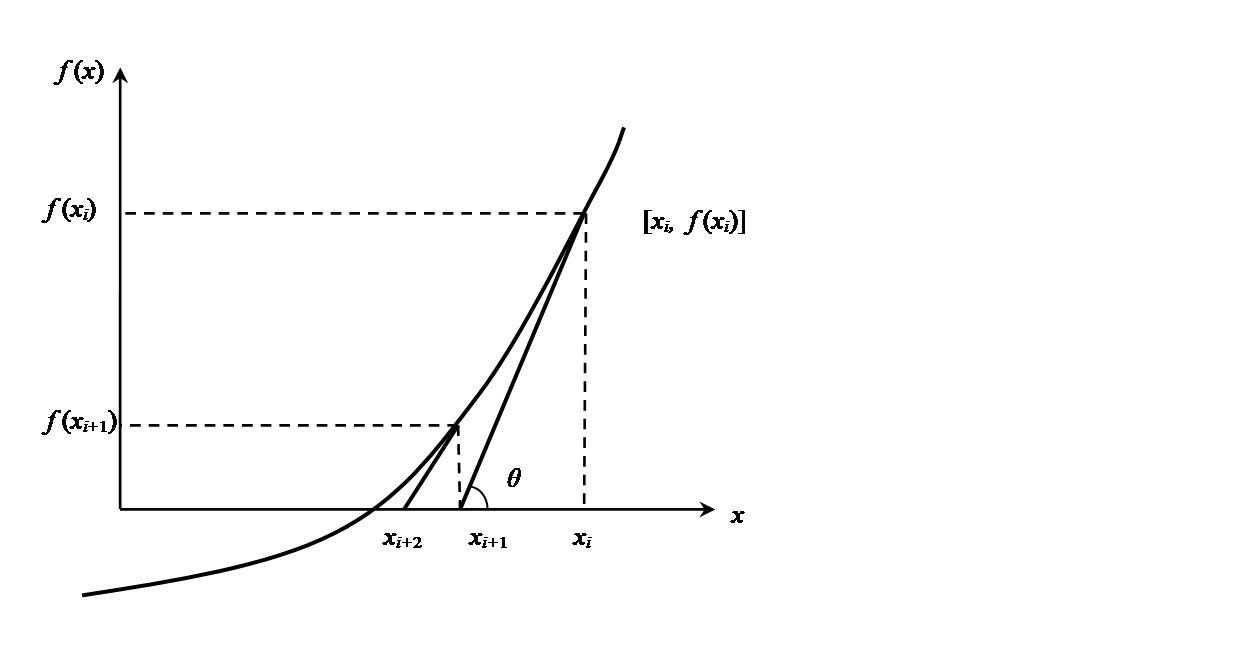

Near the root, it converges quadratically, but there are some not-uncommon scenarios where it can fail:

> Extensions which have greater than quadratic convergence using higher order derivative information do exist, however the additional computational cost is typically on par with another Newton-Raphson step, and therefore they are only used in certain niche applicaitons.

The Newton-Raphson method only finds *local* roots, not all of them. Efficient and robust root finding **requires a good initial guess**.

Fortunatley, in Engineering, this is commonly the case!


#### Example of an initial guess


If we need to solve for temperature $T(x,y,z,t)$ as a nonlinear, time dependent, partial differential equation, we will be given an initial value for $T(x,y,z, t=0)$.

When solving a nonlinear equation for $T(x,y,z,t=1)$, what do you suppose the initial guess should be?

Answer: The initial guess for should be the solution at the preceeding time step!

#### Example: find the root of $x^3-2x+2$

There is a real root at x~-1.769.

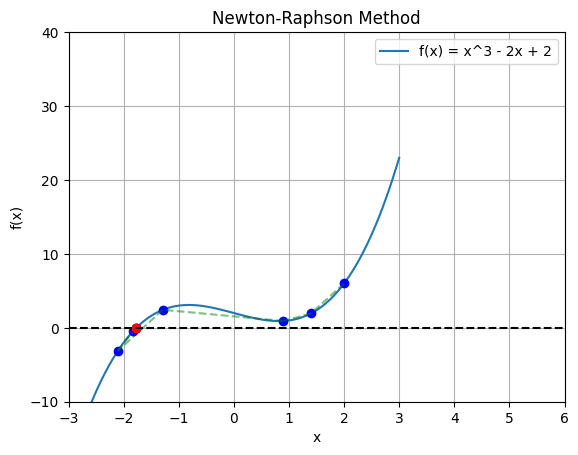

Newton-Raphson method failed to converge.


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  """The function whose root we want to find."""
  return x**3 - 2*x + 2

def df(x):
  """The derivative of the function."""
  return 3*x**2 - 2

def newton_raphson(f, df, x0, max_iter=8, tolerance=1e-6):
  """
  Finds a root of the function f using the Newton-Raphson method.

  Args:
    f: The function whose root we want to find.
    df: The derivative of the function.
    x0: The initial guess for the root.
    max_iter: The maximum number of iterations.
    tolerance: The tolerance for the root.

  Returns:
    The root of the function, or None if the method fails to converge.
  """
  x = x0
  guesses = [x]
  for i in range(max_iter):
    x_new = x - f(x) / df(x)
    guesses.append(x_new)

    if abs(x_new - x) < tolerance:
      return x_new, guesses

    x = x_new
  return None, guesses

x0 = 2
root, guesses = newton_raphson(f, df, x0)


# Plot the function and the guesses
x_vals = np.linspace(-3, 3, 100)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label="f(x) = x^3 - 2x + 2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Newton-Raphson Method")

for i, guess in enumerate(guesses):
  plt.plot(guess, f(guess), 'ro' if i == len(guesses) - 1 else 'bo')
  if i > 0:
    plt.plot([guesses[i-1], guess], [f(guesses[i-1]), f(guess)], 'g--', alpha=0.5)


plt.axhline(0, color='black', linestyle='--')  # Add horizontal line at y=0
plt.legend()
plt.xlim([-3, 6]) # Set x-axis limits
plt.ylim([-10, 40]) # Set y-axis limits
plt.grid(True)
plt.show()

if root:
  print(f"Root found: {root:.6f}")
else:
  print("Newton-Raphson method failed to converge.")


#### Example: Find the root of $\sqrt(x)$

In [ ]:
import numpy as np
def f(x):
  return np.sqrt(x)

def jacobian(x):
  return .5*x**(-1./2)

root, guesses = newton_raphson(f, jacobian, x0 = .1)
print(root, guesses)


None [0.1, np.float64(-0.1), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan)]


C:\Users\wellandm\AppData\Local\Temp\ipykernel_37792\2142821022.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(x)
C:\Users\wellandm\AppData\Local\Temp\ipykernel_37792\2142821022.py:6: RuntimeWarning: invalid value encountered in scalar power
  return .5*x**(-1./2)


What went wrong here? What else could we try?

### Some common failure situations

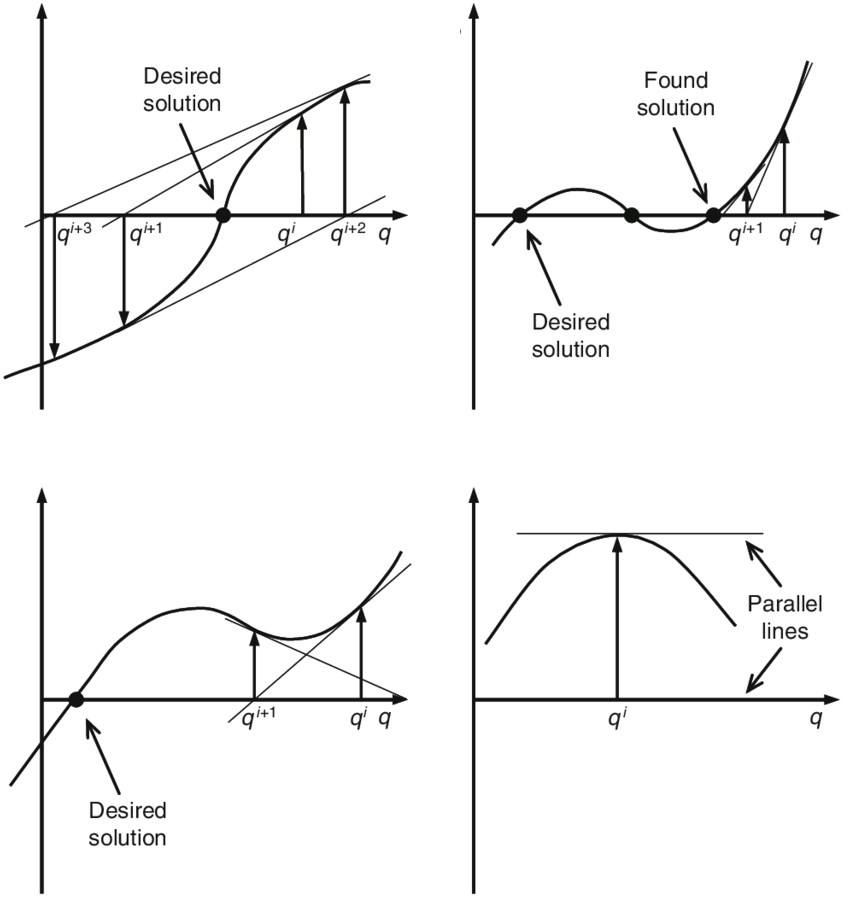

Before we talk about mitigation strategies, let's generalize the Newton-Raphson method to N-D

# The N-D Newton-Raphson method

The Newton-Raphson method thus far has been described for scalar functions or scalar arguments (i.e.: 1-D).


Consider a system of $n$ unkowns $\vec{x}$ and a set of $n$ nonlinear equations that we wish to solve simultaneously:

$$\begin{align}
f_1(\vec{x}) &= 0 \\
f_2(\vec{x}) &= 0 \\
\vdots \\
f_n(\vec{x}) &= 0
\end{align} $$

which may be summarized as a vector function $\vec{f}(\vec{x})=\vec{0}$ also of dimension $n$. Since we have $n$ equations and $n$ unkowns, we can (hopefully) find an exact solution of the simultaneous set of equations, i.e.: a root.

The Newton-Raphson method generalized quite readily except the derivative must be replaced by the vector-derivative of a vector function (called the *Jacobian*):

$$
J = \frac{\partial \vec{f}}{\partial \vec{x}} =
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \dots & \frac{\partial f_1}{\partial x_n} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \dots & \frac{\partial f_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f_n}{\partial x_1} & \frac{\partial f_n}{\partial x_2} & \dots & \frac{\partial f_n}{\partial x_n}
\end{bmatrix}
$$

where we can see that $J$ is a square $n \times n$ matrix. The Newton-Raphson method takes the form:

$$
J \Delta \vec{x} = - \vec{f}
$$

which is .... (wait for it!)... a linear system solving for the vector of increments, $\Delta\vec{x}$!

This is an example of computational-thinking: we have broken down a muiltivariable non-linear vector function into a sequence of linear systems!

#### Example: solve a system of nonlinear equations:

$$ \begin{align}
x^2 + y^2 - z &= 1 \\
x - y^2 + z^2 &= 1 \\
x y z &= 1
\end{align} $$

##### Answer

Rewrite the equations as a system of nonlinear functions:

$$\begin{align}
f_1(x, y, z) &= x^2 + y^2 - z - 1 \\
f_2(x, y, z) &= x - y^2 + z^2 -1  \\
f_3(x, y, z) &= x*y*z - 1
\end{align} $$

or in vector form:

$$\vec{f}(\vec{x}) = \begin{bmatrix}
f_1(x, y, z) \\
f_2(x, y, z) \\
f_3(x, y, z)
\end{bmatrix} =
\begin{bmatrix}
x^2 + y^2 - z - 1 \\
x - y^2 + z^2 -1 \\
x y z - 1
\end{bmatrix}
=\vec{0}
$$


The Jacobian is:

$$
J = \frac{\partial \vec{f}}{\partial \vec{x}} =
\begin{bmatrix}
2x & 2y & -1 \\
1 & -2y & 2z \\
yz & xz & xy
\end{bmatrix}
$$

Now for a given $\vec{x}$ we can solve for the increment.

In [33]:
import numpy as np

def f(x):
  """
  The system of nonlinear equations.
  """
  x, y, z = x
  return np.array([
      x**2 + y**2 - z - 1,
      x - y**2 + z**2 - 1,
      x * y * z - 1
  ])

def jacobian(x):
  """
  The Jacobian matrix.
  """
  x, y, z = x
  return np.array([
      [2 * x, 2 * y, -1],
      [1, -2 * y, 2 * z],
      [y * z, x * z, x * y]
  ])

def newton_raphson(x0, tolerance=1e-6, max_iterations=100):
  """
  Newton-Raphson method for solving a system of nonlinear equations.
  """
  x = x0
  for iter in range(max_iterations):
    f_x = f(x)
    print("Iteration, ", iter, " the guess is ", np.round(x,3), " with residual ", np.linalg.norm(f_x) )
    J_x = jacobian(x)

    #~~~~ What now? ####


    delta_x = np.linalg.solve(J_x, -f_x)
    #~~~~
    x = x + delta_x
    if np.linalg.norm(f_x) < tolerance:
      return x
  return None  # No solution found within the maximum iterations

# Initial guess
x0 = np.array([2, 2, 2])

# Solve the system
solution = newton_raphson(x0)

if solution is not None:
  print("Solution found:", solution)
else:
  print("No solution found within the maximum iterations.")


Iteration,  0  the guess is  [2 2 2]  with residual  8.660254037844387
Iteration,  1  the guess is  [1.04 1.61 1.6 ]  with residual  1.9930051233250754
Iteration,  2  the guess is  [1.07  1.091 1.066]  with residual  0.36503151275567536
Iteration,  3  the guess is  [1.001 1.008 1.007]  with residual  0.019821923184321227
Iteration,  4  the guess is  [1. 1. 1.]  with residual  9.992137180440437e-05
Iteration,  5  the guess is  [1. 1. 1.]  with residual  2.103116571058853e-09
Solution found: [1. 1. 1.]


Let's try a different initial guess:

In [ ]:
solution = newton_raphson(np.array([3, 3 , 3]))

Iteration,  0  the guess is  [3 3 3]  with residual  29.597297173897484
Iteration,  1  the guess is  [1.054 2.533 2.524]  with residual  6.998575456719698
Iteration,  2  the guess is  [0.889 1.641 1.66 ]  with residual  1.6424438231583698
Iteration,  3  the guess is  [ 2.047  0.239 -0.06 ]  with residual  3.603276469109183
Iteration,  4  the guess is  [1.707 1.028 2.231]  with residual  5.517969890171211
Iteration,  5  the guess is  [1.238 0.984 1.279]  with residual  1.0856646419132276
Iteration,  6  the guess is  [1.031 0.998 1.016]  with residual  0.0930478495194166
Iteration,  7  the guess is  [1. 1. 1.]  with residual  0.0010714827370243664
Iteration,  8  the guess is  [1. 1. 1.]  with residual  1.8136147365183113e-07


Great, but something is funny with the residual... Let's keep going!

In [ ]:
solution = newton_raphson(np.array([10, 10 , 10]))

Iteration,  0  the guess is  [10 10 10]  with residual  1016.7610338717747
Iteration,  1  the guess is  [1.037 9.488 9.486]  with residual  122.54179913742261
Iteration,  2  the guess is  [0.99  5.009 5.009]  with residual  31.151332424357115
Iteration,  3  the guess is  [0.91  2.803 2.812]  with residual  7.863318171708681
Iteration,  4  the guess is  [0.756 1.814 1.861]  with residual  1.8475446018143282
Iteration,  5  the guess is  [0.273 1.768 1.965]  with residual  0.24020703623206316
Iteration,  6  the guess is  [0.319 1.664 1.858]  with residual  0.01924168764896064
Iteration,  7  the guess is  [0.327 1.656 1.848]  with residual  0.00026048720664438785
Iteration,  8  the guess is  [0.327 1.656 1.848]  with residual  4.90450098732614e-08


Still converged but to a different root...

What about negatives?

In [ ]:
solution = newton_raphson(np.array([-1, -1 ,-1]))

Iteration,  0  the guess is  [-1 -1 -1]  with residual  3.4641016151377544
Iteration,  1  the guess is  [-7.  5.  1.]  with residual  86.62563131083085
Iteration,  2  the guess is  [-3.924  2.106  0.99 ]  with residual  21.7413789453847
Iteration,  3  the guess is  [-2.54   0.452  1.005]  with residual  5.807927456281761
Iteration,  4  the guess is  [-1.921 -0.552  1.606]  with residual  1.686308408306664
Iteration,  5  the guess is  [-1.619 -0.393  1.659]  with residual  0.13083381603982347
Iteration,  6  the guess is  [-1.583 -0.383  1.652]  with residual  0.0015836394832936728
Iteration,  7  the guess is  [-1.583 -0.382  1.652]  with residual  2.8665073240160246e-07


Another root?

In [ ]:
solution = newton_raphson(np.array([-10, 0,-10]))

Iteration,  0  the guess is  [-10   0 -10]  with residual  140.72313242676202
Iteration,  1  the guess is  [-4.786  0.01  -5.289]  with residual  35.1045008430222
Iteration,  2  the guess is  [-2.189  0.049 -2.946]  with residual  8.720052763994339
Iteration,  3  the guess is  [-0.908  0.203 -1.8  ]  with residual  2.2103101495737234
Iteration,  4  the guess is  [-0.125  0.844 -1.296]  with residual  1.3486694778260442
Iteration,  5  the guess is  [-1.024  0.136 -1.243]  with residual  1.6270099713785144
Iteration,  6  the guess is  [-0.291  0.885 -1.23 ]  with residual  1.408993850920174
Iteration,  7  the guess is  [-1.226 -0.019 -1.188]  with residual  2.1415268760927777
Iteration,  8  the guess is  [-0.531  0.676 -1.227]  with residual  1.216428132602447
Iteration,  9  the guess is  [-3.688 -2.373 -1.03 ]  with residual  23.600319365841493
Iteration,  10  the guess is  [-2.12  -0.752 -1.027]  with residual  6.304563296941992
Iteration,  11  the guess is  [-1.242  0.241 -1.154]  wit

Yikes! Note what's happening to guesses and the residual... odd behaviour indeed!